# SUTOM solver

## Imports

In [1]:
from utils.algos.entropy_solver import EntropySolver
from utils.game_env.sutom_env import SutomEnv

In [2]:
nb_letters = 5

In [3]:
folder_path = f"C:/Users/jerom/projects/online_games_solvers/sutom/word_frequency_vocab/"

In [4]:
first_letter = ""

In [5]:
sutom_env = SutomEnv(folder_path=folder_path, word_length=nb_letters, first_letter=first_letter)

AssertionError: If no target word is given, a first letter must be given.

In [16]:
entropy_solver = EntropySolver(nb_letters, folder_path, first_letter=first_letter)

Loading dataset took 0.02 seconds.
Initializing result matrix took 0.68 seconds.
Computing entropy took 0.33 seconds.
Total time: 1.03 seconds.


In [17]:
entropy_solver.dataset.sort_values(by="entropy", ascending=False)

,index,word,frequency,entropy
344,1034,cotre,1.393085e-04,3.539751
362,1052,coute,2.102292e-03,3.478746
355,1045,coure,9.656612e-05,3.463738
333,1023,corse,3.918052e-04,3.440629
341,1031,coter,1.583051e-05,3.403094
...,...,...,...,...
79,769,cappa,7.915256e-18,1.076781
66,756,canna,7.915256e-18,1.070893
22,712,cagna,1.337678e-04,1.051045
0,690,caban,1.013153e-04,1.038422


In [18]:
guess = entropy_solver.return_best_guess()
result = sutom_env.make_proposal(guess)

c o t r e     (0.69 bits remaining)
2 2 2 0 2


In [23]:
entropy_solver.update_possibilities(guess, result)
entropy_solver.dataset.sort_values(by="entropy", ascending=False)

,index,word,frequency,entropy
345,1035,cotte,1.0,-1.441542e-13


In [25]:
guess = entropy_solver.return_best_guess()
result = sutom_env.make_proposal(guess)

c o t t e     (-0.00 bits remaining)
2 2 2 2 2
You found the word, congrats!


In [6]:
import pandas as pd
import numpy as np

word_dataset = pd.read_csv(f"{folder_path}word_frequency_{nb_letters}.csv")
num_guess_dist = []
for word in word_dataset.loc[word_dataset["word"].str.startswith("c"), "word"].values:
    sutom_env = SutomEnv(folder_path=folder_path, target_word=word, word_length=nb_letters, show_first_letter=True)
    entropy_solver = EntropySolver(nb_letters, folder_path, first_letter="c")
    guess = entropy_solver.return_best_guess()
    result = sutom_env.make_proposal(guess)
    num_word_guess = 1
    while np.min(result) != 2:
        entropy_solver.update_possibilities(guess, result)
        guess = entropy_solver.return_best_guess()
        result = sutom_env.make_proposal(guess)
        num_word_guess += 1
    num_guess_dist.append(num_word_guess)

c _ _ _ _     (4.54 bits remaining)
Loading dataset took 0.01 seconds.
Initializing result matrix took 0.59 seconds.
Computing entropy took 0.35 seconds.
Total time: 0.95 seconds.
c o t r e     (3.60 bits remaining)
2 0 0 0 0
c a u s a     (-0.00 bits remaining)
2 2 0 0 1
c a l a i     (-0.00 bits remaining)
2 2 0 2 0
c a b a n     (-0.00 bits remaining)
2 2 2 2 2
You found the word, congrats!
c _ _ _ _     (4.54 bits remaining)
Loading dataset took 0.01 seconds.
Initializing result matrix took 0.48 seconds.
Computing entropy took 0.30 seconds.
Total time: 0.79 seconds.
c o t r e     (3.01 bits remaining)
2 0 0 0 0
c a u s a     (-0.00 bits remaining)
2 2 0 1 1
c a b a s     (-0.00 bits remaining)
2 2 2 2 2
You found the word, congrats!
c _ _ _ _     (4.54 bits remaining)
Loading dataset took 0.01 seconds.
Initializing result matrix took 0.49 seconds.
Computing entropy took 0.30 seconds.
Total time: 0.80 seconds.
c o t r e     (3.53 bits remaining)
2 0 0 0 0
c a u s a     (-0.00 bits r

3.690265486725664


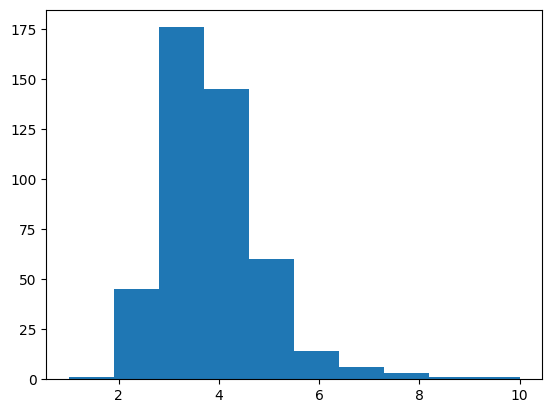

In [12]:
import matplotlib.pyplot as plt

plt.hist(num_guess_dist, range=(1, 10))
print(np.mean(num_guess_dist))